# BUSA8001 Programming Task 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 (18 October 2024) at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task

You are employed by a large travel agency to perform customer segmentation analysis. You are provided with a dataset of 2,000 customers collected through their bookings and interactions with the agency. The dataset includes variables such as customer age, gender, annual income, etc.

Your task is to analyse the data in Python using relevant techniques covered in lectures and identify distinct customer segments within the dataset. You will then compile your results into tables and diagrams and writeup a report of up to **1,000 words** (excluding tables and figures). Ensure your report is informative, intuitive, and easily understandable for management, who may not have a technical background.

Your report should address the questions listed below under the following headings:

1. **Word count** (if missing -5 marks)
    - Include the word count of your report 
2. **Introduction** (10 marks)
    - Describe the problem, explain what you aim to achieve by solving it, outline the approach you will take to address it, and specify the data you will use
3. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on key summary statistics, etc.
    - Provide charts (e.g. histograms, pie charts) where appropriate
4. **Customer Segmentation** (40 marks)
    - Standardise the two numeric variables using StandardScaler
    - Choose the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots
    - After identifying the optimal number of clusters, estimate the clusters using both the K-means++ and Agglomerative Clustering techniques. (Use all variables without applying any dimensionality reduction techniques)
    - Provide a separate table for each clustering technique that contains the cluster centers (for all variables), as well as the number of customers in each cluster
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes, i.e. profile the clients in each cluster
        - E.g., Cluster 1 may be a cluster of young, single females employed as managers on high incomes and living in large cities
     - Compare the customer segments identified by the two techniques. Do any clusters overlap?
6. **Recommendations** (20 marks)
    - Suggest marketing strategies and techniques that could be used to target customer segements previously identified using the K-means++ method 
7. **Conclusion** (10 marks)
    - A summary of what you have done in the report 
    



## Assignment Submission   
You will need to submit two files:   

1. A PDF document containing your report for company management submission. Ensure it's comprehensive, including all relevant tables and graphs generated from the Jupyter notebook that you also submit. I suggest drafting the report in Word and then converting it to PDF for submission.
2. Your Jupyter Notebook containing the Python code used in your analysis. Ensure that your code is well-organized, easy to understand, and capable of generating all the outputs included in the report (will be used to verify your analysis presented in the submitted report).

## Marking Criteria

- To receive full marks your solutions must satisfy the following criteria:
    - Provide numerically correct answers;
    - Use Python methods and libraries covered in lectures;
    - Do not include irrelevant material in the report (that you do not discuss);
    - When including tables and charts label them properly;
    - Each included table and chart you include in the report needs to be discussed in text;
    - The report is to be read by marketing managers who may not have the expertise to understand technical terms; 
        - It should be written in clear and easy to understand sentences.
    - Report must contain the word count
    - See Marking Rubric file for details


## Answer sheet
---
---


In [2]:
#data input
import pandas as pd #import pandas lib

df_segment=pd.read_csv('D:/Macquarie/Term 2-2024/BUSA 8001 Applied Predictive Analytics/BUSA8001/Assessment/Assignment2-S2-2024/BUSA8001_Assignment2/data/data.csv') 

df_segment_scaled=pd.read_csv('D:/Macquarie/Term 2-2024/BUSA 8001 Applied Predictive Analytics/BUSA8001/Assessment/Assignment2-S2-2024/BUSA8001_Assignment2/data/data.csv')



In [3]:
#Performing EDA analysis
summary=df_segment.describe(include='all')
summary.loc['mode'] = df_segment.mode().iloc[0]
summary

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000
mode,1.00000,1.000000,33.000000,1.000000,74476.000000,0.000000,0.000000


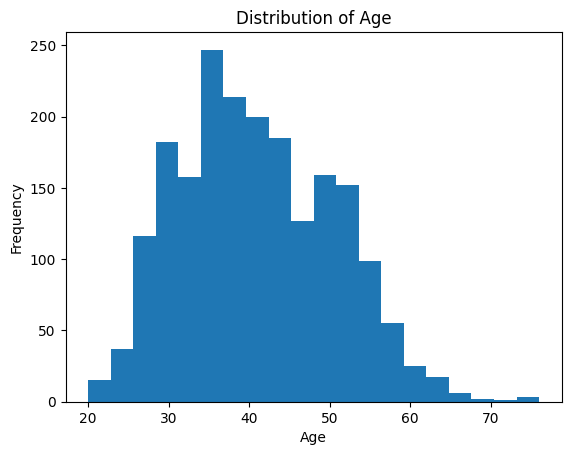

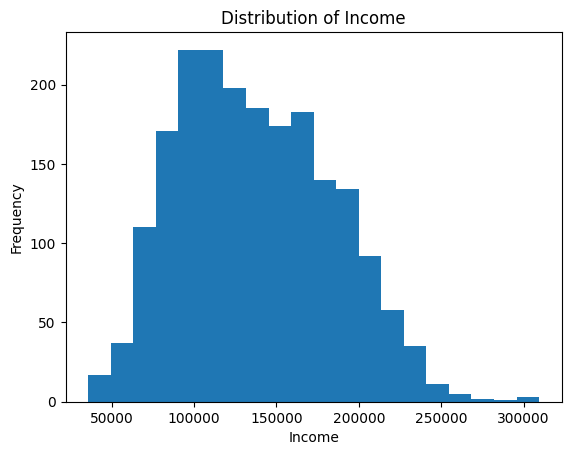

In [4]:
#histogram for age
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df_segment['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#histogram for Income
plt.hist(df_segment['Income'], bins=20)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Standardize Age
np.set_printoptions(precision=3, suppress = True)
Age_scaled = sc.fit_transform(df_segment_scaled[['Age']])
df_segment_scaled['Age']=Age_scaled

#Standardize Income
Income_scaled = sc.fit_transform(df_segment_scaled[['Income']])
df_segment_scaled['Income']=Income_scaled

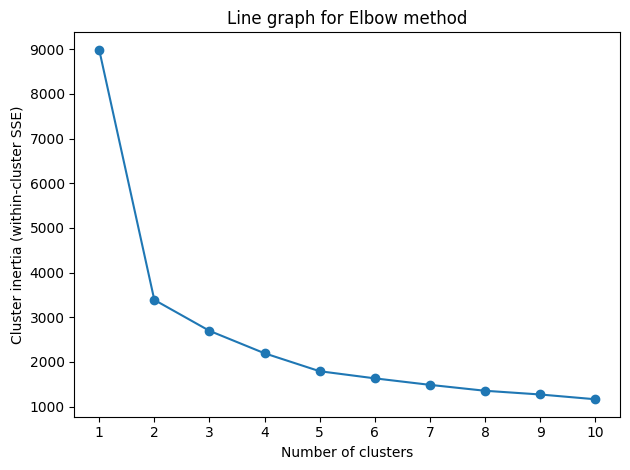

In [15]:
#finding optimal cluster number with Elbow method
from sklearn.cluster import KMeans
inertias = [] # empty list
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_segment_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Line graph for Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()
#choose 2 as the optimal number of cluster centeroids

Average silhouette coefficient for 2 clusters: 0.54


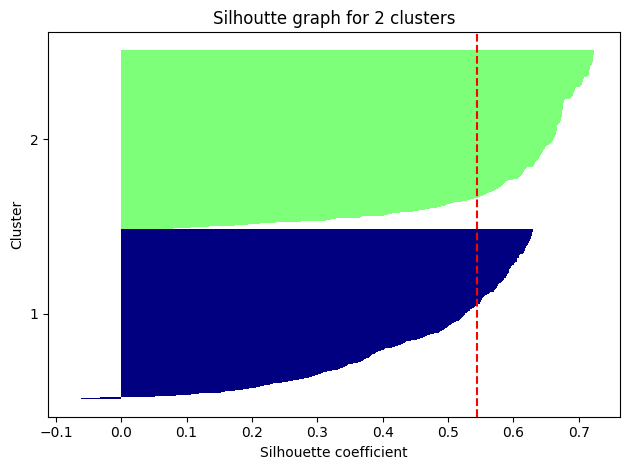

Average silhouette coefficient for 3 clusters: 0.43


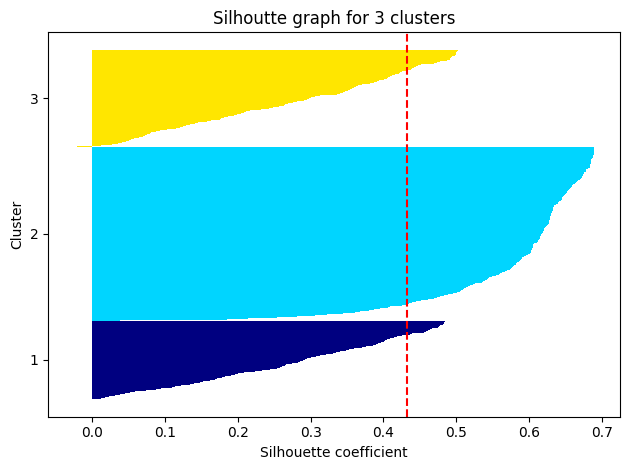

Average silhouette coefficient for 4 clusters: 0.45


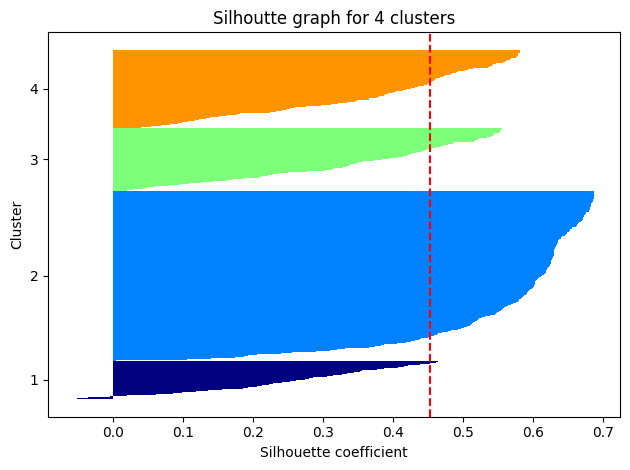

In [14]:
#finding optimal cluster number with silhoutte graphs
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

for n_clusters in [2,3,4]:
    km = KMeans(n_clusters,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
    y_km = km.fit_predict(df_segment_scaled)
    # print(y_km)
    cluster_labels = np.unique(y_km)
    # print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(df_segment_scaled, y_km, metric='euclidean')
    
## ------- plotting silhouette values -------
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    
    print(f'Average silhouette coefficient for {n_clusters} clusters: {silhouette_avg:.2f}')
    plt.title(f"Silhoutte graph for {n_clusters} clusters")
    plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [8]:
#estimate clusters using K-Means++ technique
km_plus = KMeans(n_clusters=2, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)
y_km_plus = km_plus.fit_predict(df_segment_scaled)
print('Cluster labels: %s' % y_km_plus)

Cluster labels: [0 1 1 ... 0 1 0]


In [9]:
print(km.cluster_centers_)

[[ 0.787  0.855  0.699  1.977  0.7    1.032  0.   ]
 [ 0.354  0.005 -0.786  0.805 -0.787  0.011  0.067]
 [ 0.857  0.997  1.426  2.099  1.427  1.22   1.978]
 [ 0.854  0.998  0.202  2.092  0.202  1.217  1.984]]


In [10]:
#estimate clusters using Agglomerative Clustering technique
from sklearn.cluster import AgglomerativeClustering

# ---------- 2 clusters --------------
ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(df_segment_scaled)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 ... 0 1 0]


In [11]:
#Create a table for cluster centeroids of K means++ technique

df_segment['K Means classification']=y_km_plus.tolist()
df_segment_0=df_segment[df_segment['K Means classification']==0]
df_segment_1=df_segment[df_segment['K Means classification']==1]

numerical_data=['Age','Income']
KMP_cluster={}
for i in df_segment.columns:
       if i in numerical_data: KMP_cluster[i]=df_segment_0[i].mean()
       else: KMP_cluster[i]=df_segment_0[i].mode()[0].astype(int)
KMP_cluster_0=pd.DataFrame(KMP_cluster, index=[0])

KMP_cluster={}
for i in df_segment.columns:
       if i in numerical_data: KMP_cluster[i]=df_segment_1[i].mean()
       else: KMP_cluster[i]=df_segment_1[i].mode()[0].astype(int)
KMP_cluster_1=pd.DataFrame(KMP_cluster, index=[0])

KMP_cluster=pd.concat([KMP_cluster_0,KMP_cluster_1],axis=0)
KMP_cluster['Numer of customers']=[len(df_segment_0),len(df_segment_1)]

KMP_cluster

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,K Means classification,Numer of customers
0,1,1,48.178279,2,173460.689549,1,2,0,976
0,0,0,33.813477,1,103256.601562,0,0,1,1024


In [12]:
#Create a table for cluster centeroids of Agglomerative Clustering technique

df_segment['K Means classification']=labels.tolist()
df_segment_0=df_segment[df_segment['K Means classification']==0]
df_segment_1=df_segment[df_segment['K Means classification']==1]

numerical_data=['Age','Income']
Agglo_cluster={}
for i in df_segment.columns:
       if i in numerical_data: Agglo_cluster[i]=df_segment_0[i].mean()
       else: Agglo_cluster[i]=df_segment_0[i].mode()[0].astype(int)
Agglo_cluster_0=pd.DataFrame(Agglo_cluster, index=[0])

Agglo_cluster={}
for i in df_segment.columns:
       if i in numerical_data: Agglo_cluster[i]=df_segment_1[i].mean()
       else: Agglo_cluster[i]=df_segment_1[i].mode()[0].astype(int)
Agglo_cluster_1=pd.DataFrame(Agglo_cluster, index=[0])

Agglo_cluster=pd.concat([Agglo_cluster_0,Agglo_cluster_1],axis=0)
Agglo_cluster['Numer of customers']=[len(df_segment_0),len(df_segment_1)]

Agglo_cluster


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,K Means classification,Numer of customers
0,1,1,47.080825,2,168085.081685,1,2,0,1163
0,0,0,32.129032,1,95041.150538,0,0,1,837


In [13]:
#Calculating overlap between 2 techniques
predict_0=0
predict_1=0
for i in range(len(labels)):
    if (labels[i]==y_km_plus[i]):
        if (labels[i]==0): predict_0+=1
        if (labels[i]==1): predict_1+=1
    
print(f'There are {predict_0} overlaps in clustering segmentation 0')
print(f'There are {predict_1} overlaps in clustering segmentation 1')
print(f'There are a total of {predict_0+predict_1} overlaps')
print(f'The number of differences between 2 techniques is {2000-predict_0-predict_1}')


There are 976 overlaps in clustering segmentation 0
There are 837 overlaps in clustering segmentation 1
There are a total of 1813 overlaps
The number of differences between 2 techniques is 187
